### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [ ]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [ ]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

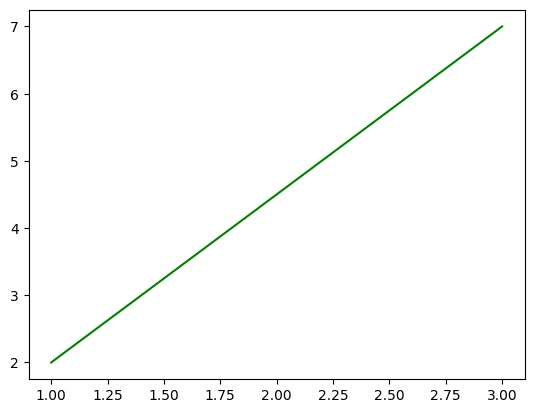

In [ ]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

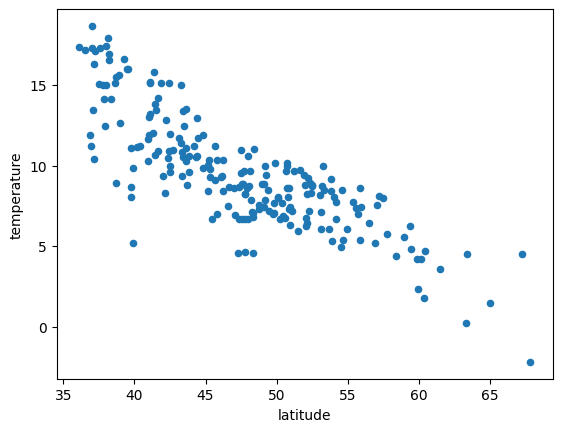

In [ ]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

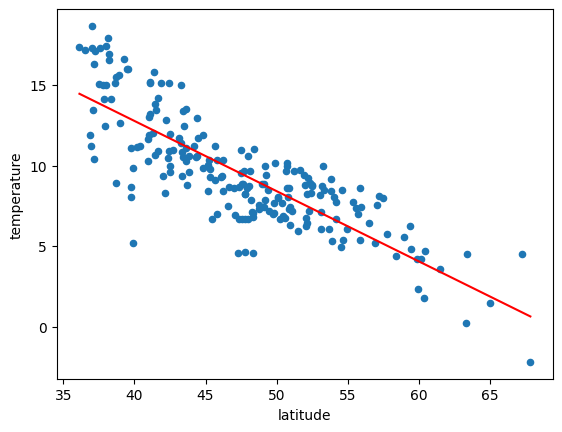

In [ ]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


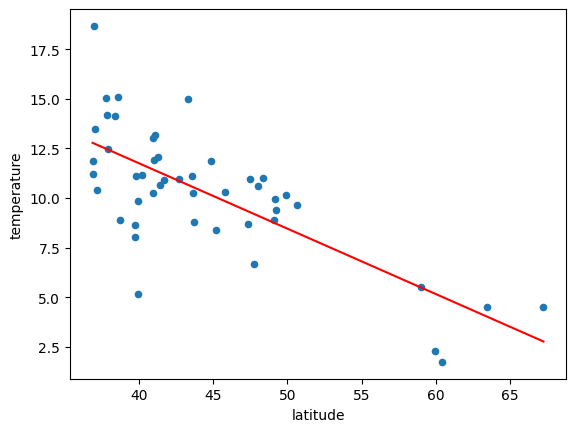

In [ ]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [ ]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Adana


<ipython-input-15-f18dd6fe1845>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b)
<ipython-input-15-f18dd6fe1845>:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 12.750248828351404
Actual temperature: 18.67
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [ ]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
YOUR CODE HERE

In [ ]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
YOUR CODE HERE

In [ ]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
YOUR CODE HERE

In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
YOUR CODE HERE

In [ ]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
YOUR CODE HERE

In [ ]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
YOUR CODE HERE